In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
data = pd.read_csv('2012-18_playerBoxScore.csv')
data.drop(['seasTyp','gmTime','teamDayOff', 'offLNm1',
       'offFNm1', 'offLNm2', 'offFNm2', 'offLNm3', 'offFNm3','playLNm', 'playFNm','opptLoc'],axis = 1,inplace = True)

In [3]:
#Get Bradley Beal's Box Score Data
beal = data[data['playDispNm']== 'Bradley Beal']

#PLAYER NAME: BRADLEY BEAL
#POSITION: SG
#TEAM: WIZARDS
#DIVISION: SOUTHEAST
#CONFERENCE: EAST
#HEIGHT:77 
#WEIGHT: 202 LBS
#BIRTH DATE:1993-06-28

#Drop unneccessary columns and rename 
beal.drop(['teamDiv','teamAbbr','teamConf','playDispNm','playPos','playWeight','playHeight','playBDate'],axis = 1, inplace = True)
col = {'playMin':'Minutes','playPTS':'PTS','playAST':'AST','playTO':'TO','playSTL':'STL','playBLK':'BLK','playPF':'PF','playFGA':'FGA','playFGM':'FGM','playFG%':'FG%','play2PA':'2PA','play2PM':'2PM','play2P%':'2P%','play3PA':'3PA','play3PM':'3PM','play3P%':'3P%','playFTA':'FTA','playFTM':'FTM','playFT%':'FT%','playORB':'ORB','playDRB':'DRB','playTRB':'TRB'}
beal.rename(columns = col,inplace = True)
beal = beal.reset_index(drop=True)
beal =beal.reset_index(drop=False)
beal.rename(columns = {'index':'game_num'},inplace = True)

In [4]:
tot_win = 217 
tot_loss = 189 
win_per = tot_win/(tot_win + tot_loss) 
win_per

0.5344827586206896

In [34]:
#divide by dates by season then analyze by each season
def seasonDate(df):
    df['Season'] = df['gmDate']
    df.loc[ df['Season'] <= '2013-06', 'Season'] = '1st'
    df.loc[ (df['Season'] <= '2014-06') & (df['Season'] > '2013-06'), 'Season'] = '2nd'
    df.loc[ (df['Season'] <= '2015-06') & (df['Season'] > '2014-06'), 'Season'] = '3rd'
    df.loc[ (df['Season'] <= '2016-06') & (df['Season'] > '2015-06'), 'Season'] = '4th'
    df.loc[ (df['Season'] <= '2017-06') & (df['Season'] > '2016-06'), 'Season'] = '5th'
    df.loc[ (df['Season'] <= '2018-06') & (df['Season'] > '2017-06'), 'Season'] = '6th'
    return df
beal  = seasonDate(beal)
beal['Ostats'] = beal['PTS'] +beal['AST'] + beal['ORB']
beal['Dstats'] = beal['BLK'] +beal['STL'] + beal['DRB']

In [35]:
beal.groupby('Season').mean()


,game_num,Minutes,PTS,AST,TO,STL,BLK,PF,FGA,FGM,...,3P%,FTA,FTM,FT%,ORB,DRB,TRB,opptDayOff,Ostats,Dstats
Season,,,,,,,,,,,,,,,,,,,,,
1st,27.5,31.160714,13.928571,2.464286,1.607143,0.892857,0.517857,2.017857,12.267857,5.035714,...,0.338200,2.839286,2.232143,0.568125,0.767857,3.000000,3.767857,2.035714,17.160714,4.410714
2nd,92.0,34.643836,17.109589,3.356164,1.753425,0.972603,0.246575,2.095890,15.739726,6.589041,...,0.403781,2.589041,2.041096,0.586760,0.739726,3.000000,3.739726,2.123288,21.205479,4.219178
3rd,160.0,33.476190,15.301587,3.079365,1.952381,1.190476,0.269841,2.158730,13.523810,5.777778,...,0.406444,2.634921,2.063492,0.543197,0.920635,2.920635,3.841270,1.904762,19.301587,4.380952
4th,219.0,31.072727,17.418182,2.927273,2.036364,0.981818,0.200000,2.127273,14.527273,6.527273,...,0.390498,3.200000,2.454545,0.644385,0.745455,2.690909,3.436364,2.163636,21.090909,3.872727
5th,285.0,34.922078,23.103896,3.454545,2.025974,1.116883,0.272727,2.194805,17.181818,8.272727,...,0.407436,4.441558,3.662338,0.758905,0.675325,2.402597,3.077922,1.506494,27.233766,3.792208
6th,364.5,36.317073,22.646341,4.548780,2.609756,1.182927,0.426829,1.951220,18.097561,8.329268,...,0.350335,4.500000,3.560976,0.680338,0.743902,3.670732,4.414634,1.731707,27.939024,5.280488


Text(0.5, 1.0, 'POINT DISTRIBUTION BY SEASON')

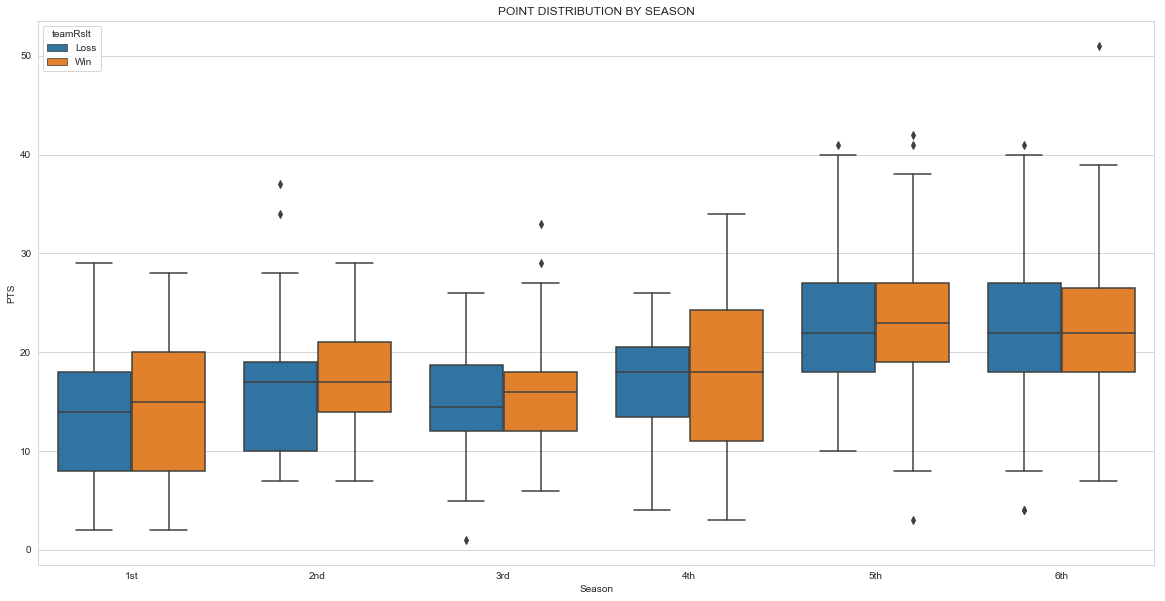

In [84]:
pt_seas = beal[['PTS','Season', 'teamRslt']]
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Season',y='PTS',data = pt_seas,hue = 'teamRslt')
plt.title('POINT DISTRIBUTION BY SEASON')


Text(0.5, 1.0, 'O STAT DISTRIBUTION BY SEASON')

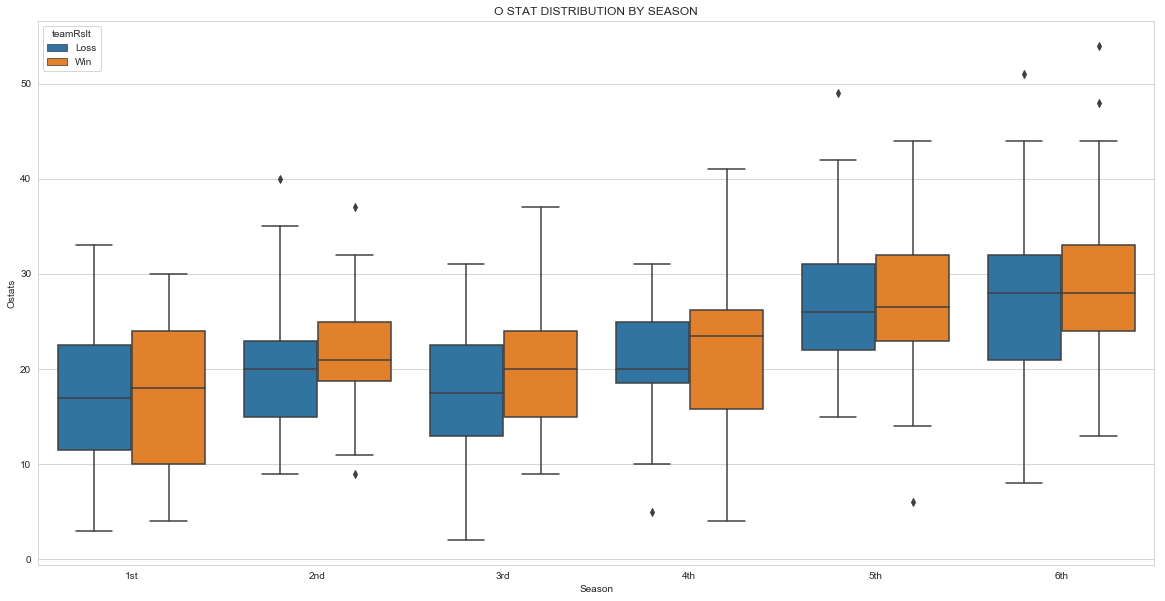

In [83]:
o_seas = beal[['Ostats','Season','teamRslt']]
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Season',y='Ostats',data = o_seas,hue = 'teamRslt')
plt.title('O STAT DISTRIBUTION BY SEASON')

Text(0.5, 1.0, 'D STAT DISTRIBUTION BY SEASON')

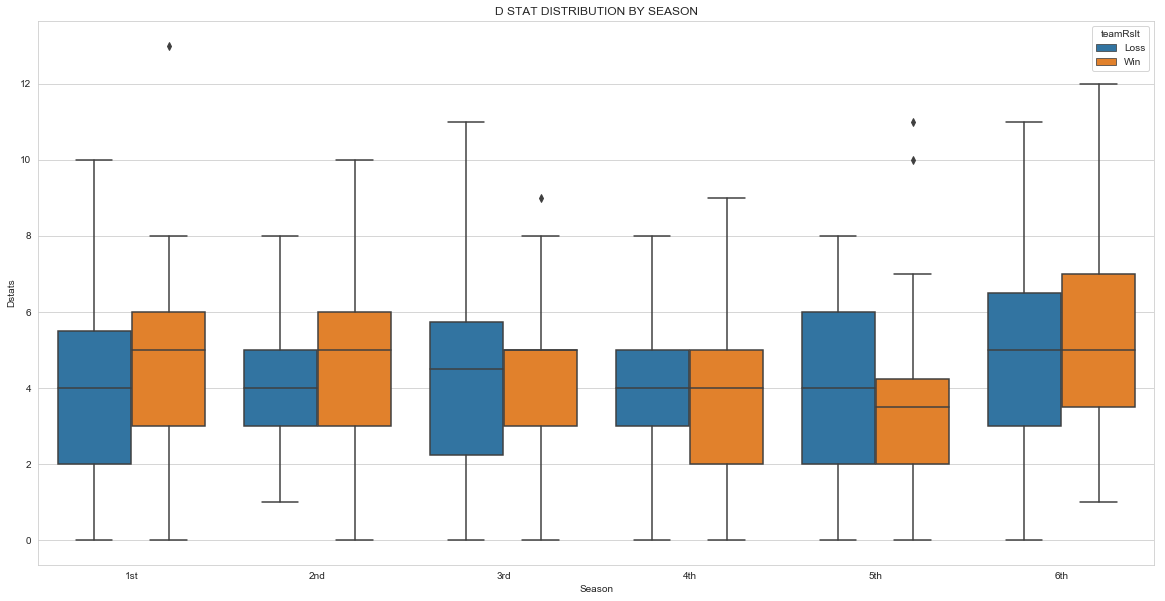

In [82]:
d_seas = beal[['Dstats','Season','teamRslt']]
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Season',y='Dstats',data = d_seas,hue = 'teamRslt')
plt.title('D STAT DISTRIBUTION BY SEASON')

In [27]:
#Beal's Average Stats By Opposing Team
beal.groupby('opptAbbr').mean().sort_values(by='PTS',ascending = False)

,game_num,Minutes,PTS,AST,TO,STL,BLK,PF,FGA,FGM,...,3PA,3PM,3P%,FTA,FTM,FT%,ORB,DRB,TRB,opptDayOff
opptAbbr,,,,,,,,,,,,,,,,,,,,,
OKC,201.200000,37.800000,23.100000,3.700000,2.600000,0.900000,0.100000,2.100000,17.700000,8.200000,...,7.500000,3.800000,0.508440,3.700000,2.900000,0.768100,1.100000,4.500000,5.600000,1.700000
PHO,192.083333,32.250000,22.416667,2.166667,1.750000,1.250000,0.250000,2.500000,16.166667,7.916667,...,5.333333,2.500000,0.445833,4.916667,4.083333,0.563917,0.666667,3.750000,4.416667,1.666667
LAC,219.555556,36.666667,22.333333,3.222222,1.000000,1.333333,0.111111,2.666667,17.000000,7.666667,...,7.111111,3.222222,0.420044,4.888889,3.777778,0.586289,1.222222,2.000000,3.222222,2.111111
TOR,196.437500,38.000000,21.500000,3.687500,2.062500,0.937500,0.375000,2.562500,17.125000,7.875000,...,6.250000,2.687500,0.413950,3.562500,3.062500,0.777088,1.187500,3.437500,4.625000,2.250000
NY,207.944444,35.222222,20.833333,3.222222,1.833333,1.444444,0.277778,1.388889,16.277778,7.833333,...,6.055556,2.444444,0.414639,3.444444,2.722222,0.631661,0.611111,3.388889,4.000000,1.833333
MIL,223.437500,35.187500,20.812500,3.875000,2.875000,0.625000,0.687500,2.250000,15.625000,7.500000,...,5.750000,2.000000,0.343006,4.375000,3.812500,0.804538,0.625000,2.437500,3.062500,1.500000
MEM,226.125000,36.750000,20.625000,3.375000,1.750000,1.000000,0.125000,2.500000,16.750000,7.500000,...,6.000000,2.125000,0.338400,4.000000,3.500000,0.731250,0.500000,2.875000,3.375000,1.375000
HOU,190.500000,34.333333,20.250000,2.916667,2.166667,1.333333,0.416667,2.750000,15.833333,6.916667,...,6.583333,2.500000,0.359108,4.333333,3.916667,0.765867,0.833333,2.833333,3.666667,1.333333
SAC,191.727273,34.818182,20.181818,4.818182,1.909091,0.636364,0.363636,1.909091,15.454545,7.454545,...,6.181818,2.818182,0.434955,3.000000,2.454545,0.754545,1.000000,3.636364,4.636364,1.727273


In [30]:
#Beal's Max Stats By Opposing Team
beal.groupby('opptAbbr').max().sort_values(by='PTS',ascending = False)

,game_num,gmDate,teamLoc,teamRslt,playStat,Minutes,PTS,AST,TO,STL,...,FTM,FT%,ORB,DRB,TRB,opptConf,opptDiv,opptRslt,opptDayOff,Season
opptAbbr,,,,,,,,,,,,,,,,,,,,,
POR,347,2017-12-05,Home,Win,Starter,43,51,7,3,3,...,8,1.0,2,5,5,West,Northwest,Win,3,6th
PHO,348,2017-12-07,Home,Win,Starter,40,42,5,4,4,...,10,1.0,2,7,9,West,Pacific,Win,3,6th
OKC,373,2018-01-30,Home,Win,Starter,46,41,9,5,2,...,7,1.0,4,9,12,West,Northwest,Win,3,6th
LAC,352,2017-12-15,Home,Win,Starter,40,41,4,2,3,...,9,1.0,6,9,11,West,Pacific,Win,3,6th
CLE,402,2018-04-05,Home,Win,Starter,47,41,9,6,3,...,11,1.0,3,8,9,East,Central,Win,9,6th
PHI,383,2018-02-25,Home,Win,Starter,42,40,8,7,3,...,12,1.0,2,7,9,East,Atlantic,Win,8,6th
CHI,400,2018-04-01,Home,Win,Starter,45,39,9,4,3,...,6,1.0,2,9,9,East,Central,Win,4,6th
TOR,386,2018-03-02,Home,Win,Starter,51,38,6,5,3,...,8,1.0,4,9,10,East,Atlantic,Win,6,6th
SAC,336,2017-11-13,Home,Win,Starter,43,38,7,3,1,...,7,1.0,3,8,10,West,Pacific,Win,2,6th


Text(0.5, 1.0, 'Point Breakdown')

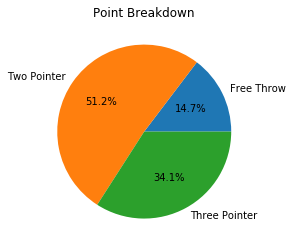

In [31]:
two_pt = 2*beal['2PM'].sum()
one_pt =beal['FTM'].sum()
three_pt = 3*beal['3PM'].sum()
labels = ['Free Throw','Two Pointer','Three Pointer']
sizes = [one_pt,two_pt,three_pt]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Point Breakdown')

In [218]:
#DOUBLE DOUBLES 
dd1 = beal[(beal['PTS']>=10)& (beal['TRB']>=10)]
dd2 = beal[(beal['PTS']>=10)& (beal['AST']>=10)]
dd3 = beal[(beal['AST']>=10)& (beal['TRB']>=10)]
dd = pd.concat([dd1, dd2, dd3])
dd.drop(['game_num','playStat','opptConf','opptDiv','opptRslt','opptDayOff','2PA','FT%','FTM','FTA','ORB','DRB','FGA','3PA','Ostats','Dstats'],axis = 1, inplace = True)
dd = dd[['Season','gmDate','Minutes','PTS','AST','TRB','STL','BLK','TO','PF','FGM','2PM','2P%','3PM','3P%','teamLoc','teamRslt','opptAbbr']]


In [219]:
#TRIPLE DOUBLES (NONE)
tt = beal[(beal['PTS']>=10)& (beal['TRB']>=10) &(beal['AST']>=10)]

tt.drop(['game_num','playStat','opptConf','opptDiv','opptRslt','opptDayOff','2PA','FT%','FTM','FTA','ORB','DRB','FGA','3PA','Ostats','Dstats'],axis = 1, inplace = True)
tt = tt[['Season','gmDate','Minutes','PTS','AST','TRB','STL','BLK','TO','PF','FGM','2PM','2P%','3PM','3P%','teamLoc','teamRslt','opptAbbr']]


In [119]:
plus_20_pts= beal[beal['PTS']>=20]['game_num'].count()
plus_30_pts= beal[beal['PTS']>=30]['game_num'].count()
plus_40_pts= beal[beal['PTS']>=40]['game_num'].count()
plus_50_pts= beal[beal['PTS']>=50]['game_num'].count()
plus_10_ast= beal[beal['AST']>=10]['game_num'].count()

print('Bradley Beal had %2d 20+ point games throughout his career. ' % (plus_20_pts))
print('Bradley Beal had %2d 30+ point games throughout his career. ' % (plus_30_pts))
print('Bradley Beal had %2d 40+ point games throughout his career. ' % (plus_40_pts))
print('Bradley Beal had %2d 50+ point games throughout his career. ' % (plus_50_pts))
print('Bradley Beal had %2d 10+ assist games throughout his career. ' % (plus_10_ast))


Bradley Beal had 175 20+ point games throughout his career. 
Bradley Beal had 32 30+ point games throughout his career. 
Bradley Beal had  7 40+ point games throughout his career. 
Bradley Beal had  1 50+ point games throughout his career. 
Bradley Beal had  1 10+ assist games throughout his career. 


Text(0, 0.5, 'MAKES')

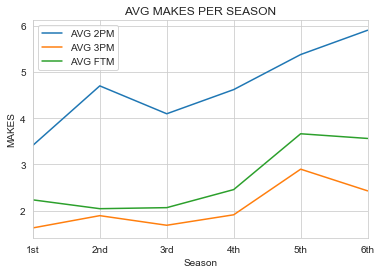

In [146]:
avg_2pm = beal.groupby('Season')['2PM'].mean().plot()
avg_3pm = beal.groupby('Season')['3PM'].mean().plot()
avg_ftm = beal.groupby('Season')['FTM'].mean().plot()
plt.legend(['AVG 2PM','AVG 3PM','AVG FTM'])
plt.title('AVG MAKES PER SEASON')
plt.ylabel('MAKES')

Text(0, 0.5, 'Points')

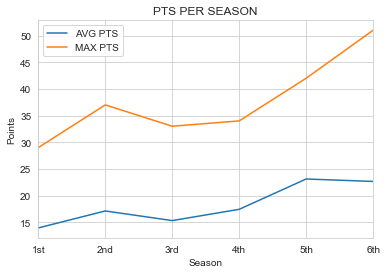

In [140]:
avg_pts = beal.groupby('Season')['PTS'].mean().plot()
max_pts = beal.groupby('Season')['PTS'].max().plot()
plt.legend(['AVG PTS','MAX PTS'])
plt.title('PTS PER SEASON')
plt.ylabel('Points')

Text(0, 0.5, 'Opposing Teams')

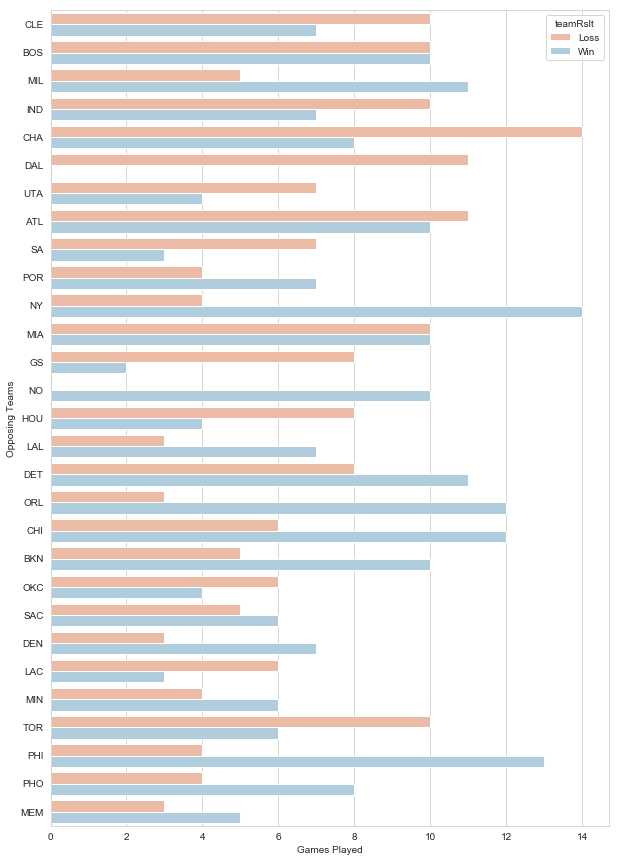

In [217]:
plt.figure(figsize=(10,15))
sns.countplot(y='opptAbbr',hue = 'teamRslt',data= beal,orient = "h",palette = 'RdBu')
plt.xlabel('Games Played')
plt.ylabel('Opposing Teams')

In [229]:
#last graph showed that Beal never win against the Dallas Mavericks. 
no_win = beal[(beal['opptAbbr']=='DAL')& (beal['teamRslt']== 'Win')]['teamRslt'].count()
print('Beal had %2d wins against the Mavs.'% no_win)
#Last graph also showed Beal never lost against the New Orleans Pelicans
no_loss = beal[(beal['opptAbbr']=='NO')& (beal['teamRslt']== 'Loss')]['teamRslt'].count()
print('Beal had %2d losses against the Pels.'% no_loss)

Beal had  0 wins against the Mavs.
Beal had  0 losses against the Pels.


In [239]:
#TOTALS STATS FROM 2012-2018
beal[['Minutes','PTS', 'AST', 'TO', 'STL', 'BLK', 'PF', 'FGA', 'FGM', '2PA',
'2PM', '3PA', '3PM', 'FTA', 'FTM', 'ORB', 'DRB','TRB']].sum().astype(int)

Minutes    13759
PTS         7587
AST         1377
TO           823
STL          433
BLK          131
PF           848
FGA         6294
FGM         2806
2PA         4102
2PM         1944
3PA         2192
3PM          862
FTA         1401
FTM         1113
ORB          309
DRB         1205
TRB         1514
dtype: int32

In [287]:
car_fg = round(beal['FG%'].mean()*100,2)
car_2p = round(beal['2P%'].mean()*100,2)
car_3p = round(beal['3P%'].mean()*100,2)

print('Beal\'s career Field Goal % is ' + str(car_fg)+ " %")
print('Beal\'s career 2 Pointer % is ' + str(car_2p)+ " %")
print('Beal\'s career 3 Pointer % is ' + str(car_3p)+ " %")
beal.columns

Beal's career Field Goal % is 43.9 %
Beal's career 2 Pointer % is 46.12 %
Beal's career 3 Pointer % is 38.32 %


Index(['game_num', 'gmDate', 'teamLoc', 'teamRslt', 'playStat', 'Minutes',
       'PTS', 'AST', 'TO', 'STL', 'BLK', 'PF', 'FGA', 'FGM', 'FG%', '2PA',
       '2PM', '2P%', '3PA', '3PM', '3P%', 'FTA', 'FTM', 'FT%', 'ORB', 'DRB',
       'TRB', 'opptAbbr', 'opptConf', 'opptDiv', 'opptRslt', 'opptDayOff',
       'Season', 'Ostats', 'Dstats'],
      dtype='object')

In [288]:
beal.iplot(x='game_num',y=['PTS', 'AST', 'TO', 'STL', 'BLK', 'PF', 'FGA', 'FGM', 'FG%', '2PA',
       '2PM', '2P%', '3PA', '3PM', '3P%', 'FTA', 'FTM', 'FT%', 'ORB', 'DRB',
       'TRB', 'Ostats', 'Dstats'],title= 'STATS BY GAME')

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''